# Proyecto 2

In [3]:
#!pip install pyspellchecker
#!pip intall textatistic
#!pip install -U LeXmo
#!pip install emot
#!pip install nrclex
!pip install Textatistic

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for Textatistic: filename=textatistic-0.0.1-py3-none-any.whl size=29058 sha256=127fbf49e6ca1131de3c1e66ebed4cb94ee9cfd25ba960d82568435f111453ea
  Stored in directory: c:\users\juana\appdata\local\pip\cache\wheels\82\24\c4\de7882083c3530984f6eda43ae9e94875c84d906063ef10bcb
Successfully built Textatistic


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker

from textatistic import Textatistic
from LeXmo import LeXmo
import emot
import nrclex

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juana\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Limpieza de Datos

In [5]:
data = pd.read_csv('train.csv')
data.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate


In [6]:
duplicated_discourse_ids = data[data['discourse_id'].duplicated(keep=False)]
duplicated_discourse_ids.sort_values(by='discourse_id')

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness


In [30]:
data.isna().sum()

discourse_id               0
essay_id                   0
discourse_text             0
discourse_type             0
discourse_effectiveness    0
word_count                 0
avg_word_length            0
sentences_count            0
words_per_sentence         0
readability                0
dtype: int64

In [7]:
def handle_contractions(text):
    words = word_tokenize(text)
    words = [contractions[word] if word in contractions else word for word in words]
    return ' '.join(words)

def spell_correction(text):
    spell = SpellChecker()
    words = word_tokenize(text)
    corrected_words = [spell.correction(word) if spell.correction(word) is not None else word for word in words]
    return ' '.join(corrected_words)

def word_count(text):
    words = text.split()
    return len(words)

def avg_word_length(text):
    words = text.split()
    word_lengths = [len(word) for word in words]
    avg_word_length = sum(word_lengths)/len(words)
    return(avg_word_length)

def sentences_count(text):
    sentences = nltk.sent_tokenize(text)
    return len(sentences)

def get_emotions(text):
    emo = LeXmo.LeXmo(text)
    return pd.Series([emo['anger'], emo['anticipation'], emo['disgust'], emo['fear'], emo['joy'], emo['negative'],
                      emo['positive'], emo['sadness'], emo['surprise'], emo['trust']])

def get_readability(text):
    return Textatistic(text).scores['gunningfog_score']
    
contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "needn't": "need not",
    "oughtn't": "ought not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that'd": "that would",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what's": "what is",
    "where's": "where is",
    "who'll": "who will",
    "who's": "who is",
    "won't": "will not",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
}

In [8]:
data['word_count'] = data['discourse_text'].apply(word_count)
data['avg_word_length'] = data['discourse_text'].apply(avg_word_length)
data['sentences_count'] = data['discourse_text'].apply(sentences_count)
data['words_per_sentence'] = data['word_count'] / data['sentences_count']
data['readability'] = (data['discourse_text'] + '.').apply(get_readability)
data.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,word_count,avg_word_length,sentences_count,words_per_sentence,readability
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,67,3.731343,3,22.333333,7.894030
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,41,4.121951,2,20.500000,11.126829
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,21,4.000000,1,21.000000,12.209524
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,72,4.027778,4,18.000000,8.537778
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,18,4.611111,1,18.000000,3.600000


In [9]:
# Convertir todo a minuscula
data['discourse_text'] = data['discourse_text'].str.lower()

data['discourse_text'] = data['discourse_text'].apply(handle_contractions)

data['discourse_text'] = data['discourse_text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
data['discourse_text'] = data['discourse_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [10]:
stop = stopwords.words('english')
for i in range(len(data)):
    data.loc[i, 'discourse_text'] = ' '.join([word for word in data.loc[i, 'discourse_text'].split() if word not in (stop)])

data['discourse_text'] = data['discourse_text'].apply(lambda x: re.sub(r'\d+', '', x))

In [11]:
data.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,word_count,avg_word_length,sentences_count,words_per_sentence,readability
0,0013cc385424,007ACE74B050,hi isaac going writing face mars natural landf...,Lead,Adequate,67,3.731343,3,22.333333,7.894030
1,9704a709b505,007ACE74B050,perspective think face natural landform dont t...,Position,Adequate,41,4.121951,2,20.500000,11.126829
2,c22adee811b6,007ACE74B050,think face natural landform life mars descover...,Claim,Adequate,21,4.000000,1,21.000000,12.209524
3,a10d361e54e4,007ACE74B050,life mars would know reason think natural land...,Evidence,Adequate,72,4.027778,4,18.000000,8.537778
4,db3e453ec4e2,007ACE74B050,people thought face formed alieans thought lif...,Counterclaim,Adequate,18,4.611111,1,18.000000,3.600000


## Análisis Exploratorio

In [12]:
colors = ['red', 'orange', 'green']
order = ['Ineffective', 'Adequate', 'Effective']

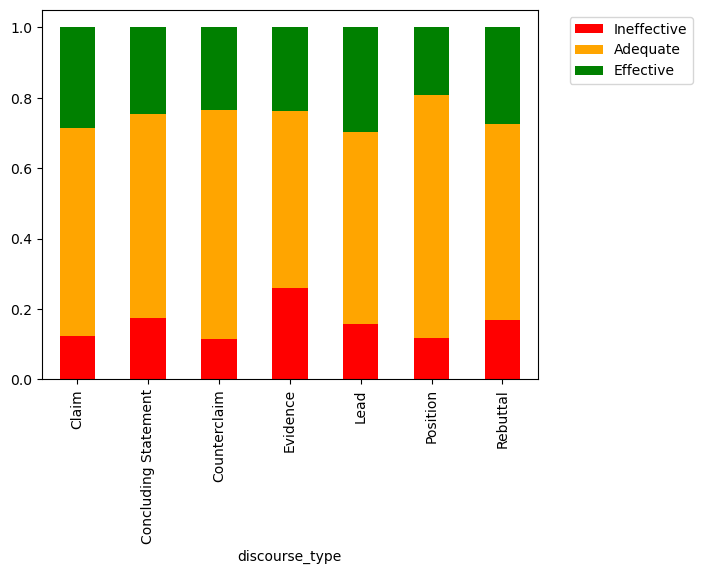

In [13]:
crosstab = pd.crosstab(data['discourse_type'], data['discourse_effectiveness'], normalize='index')
ax = crosstab[order].plot(kind='bar', stacked=True, color=colors)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

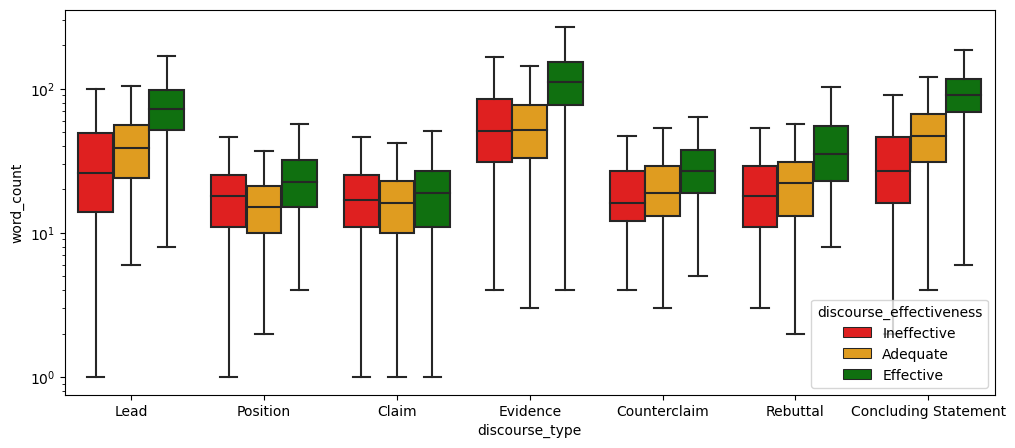

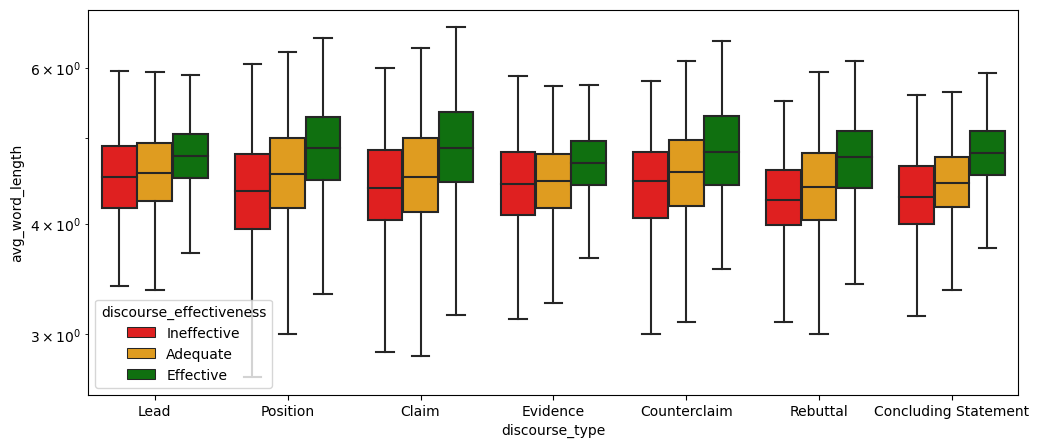

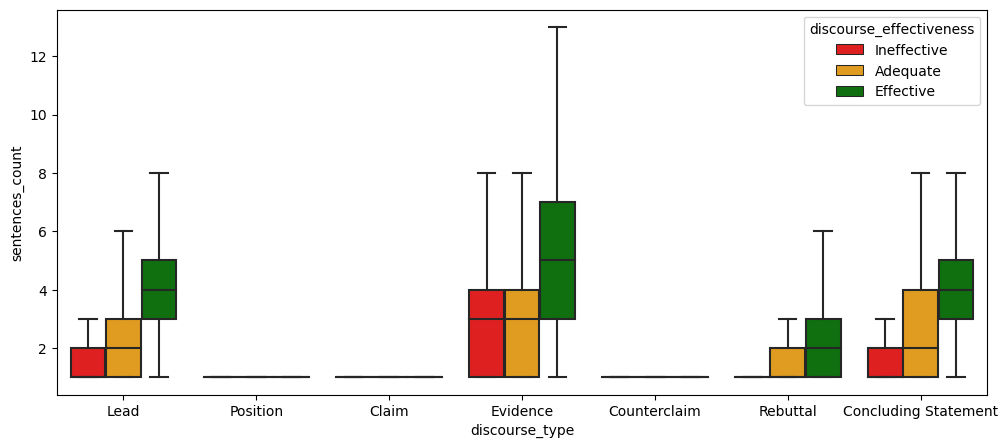

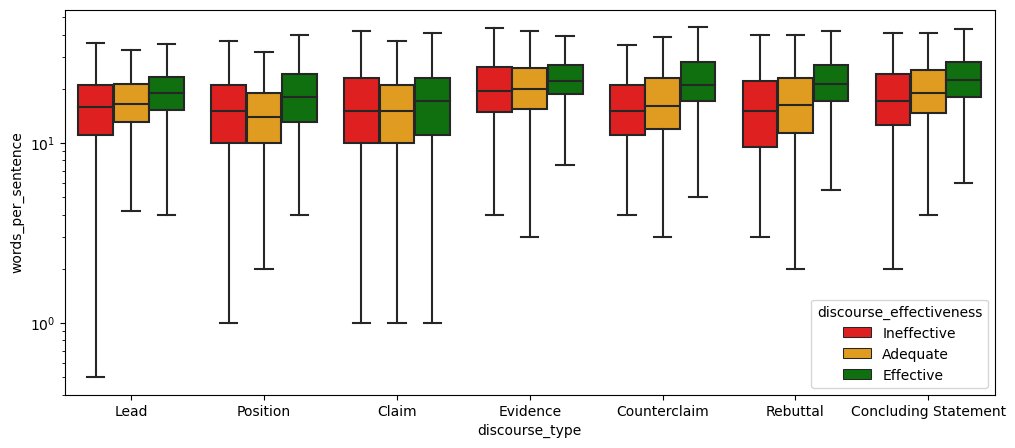

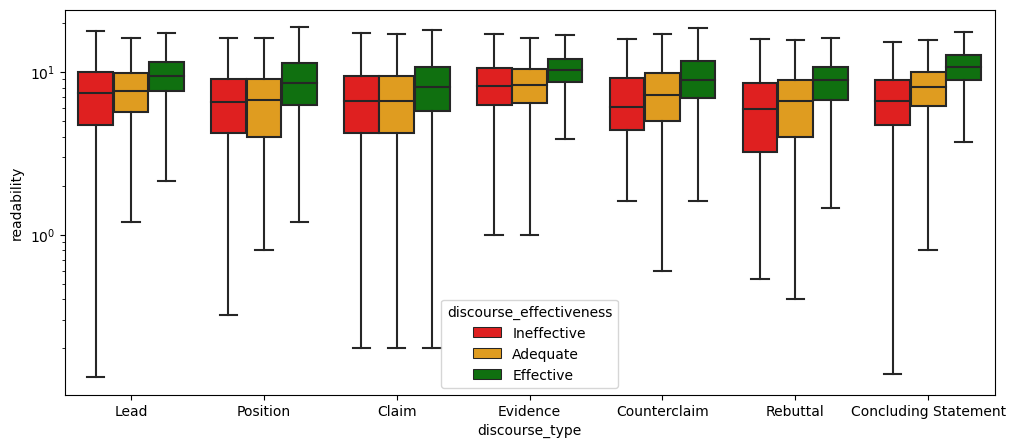

In [14]:
num_cols = ['word_count', 'avg_word_length', 'sentences_count', 'words_per_sentence', 'readability']
log_cols = ['word_count', 'avg_word_length', 'words_per_sentence', 'readability']
for col in num_cols:
    plt.figure(figsize=(12,5))
    sns.boxplot(x='discourse_type', y=col, hue='discourse_effectiveness', data=data,
                showfliers=False, hue_order=order, palette=colors)
    if col in log_cols:
        plt.yscale('log')
    plt.show()

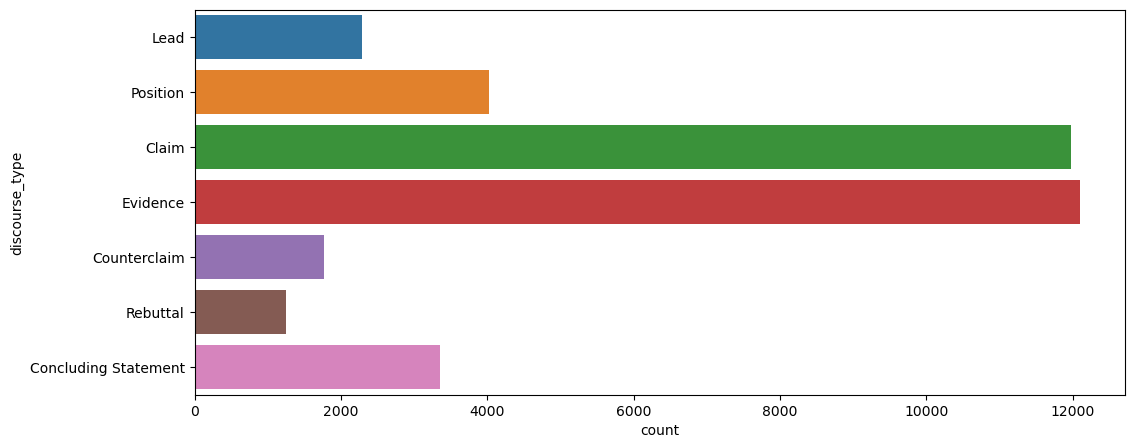

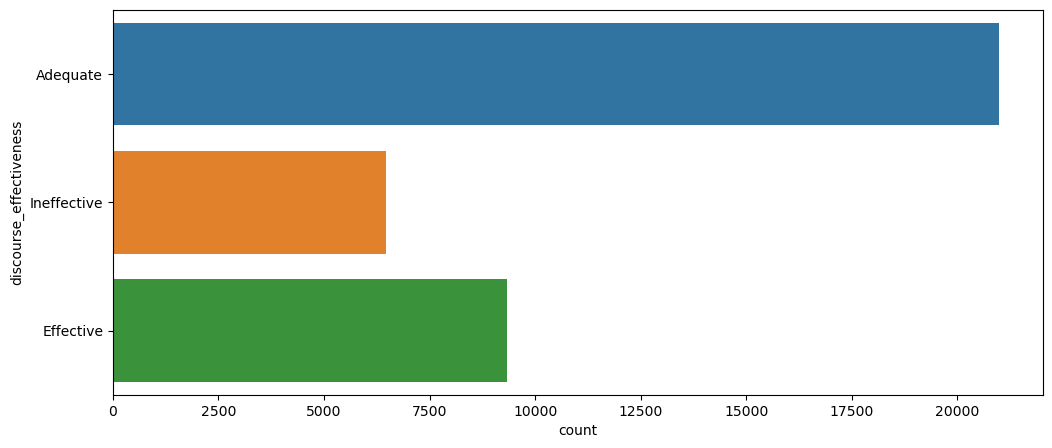

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(data = data, y="discourse_type")
plt.show()
plt.figure(figsize=(12,5))
sns.countplot(data=data, y="discourse_effectiveness")
plt.show()

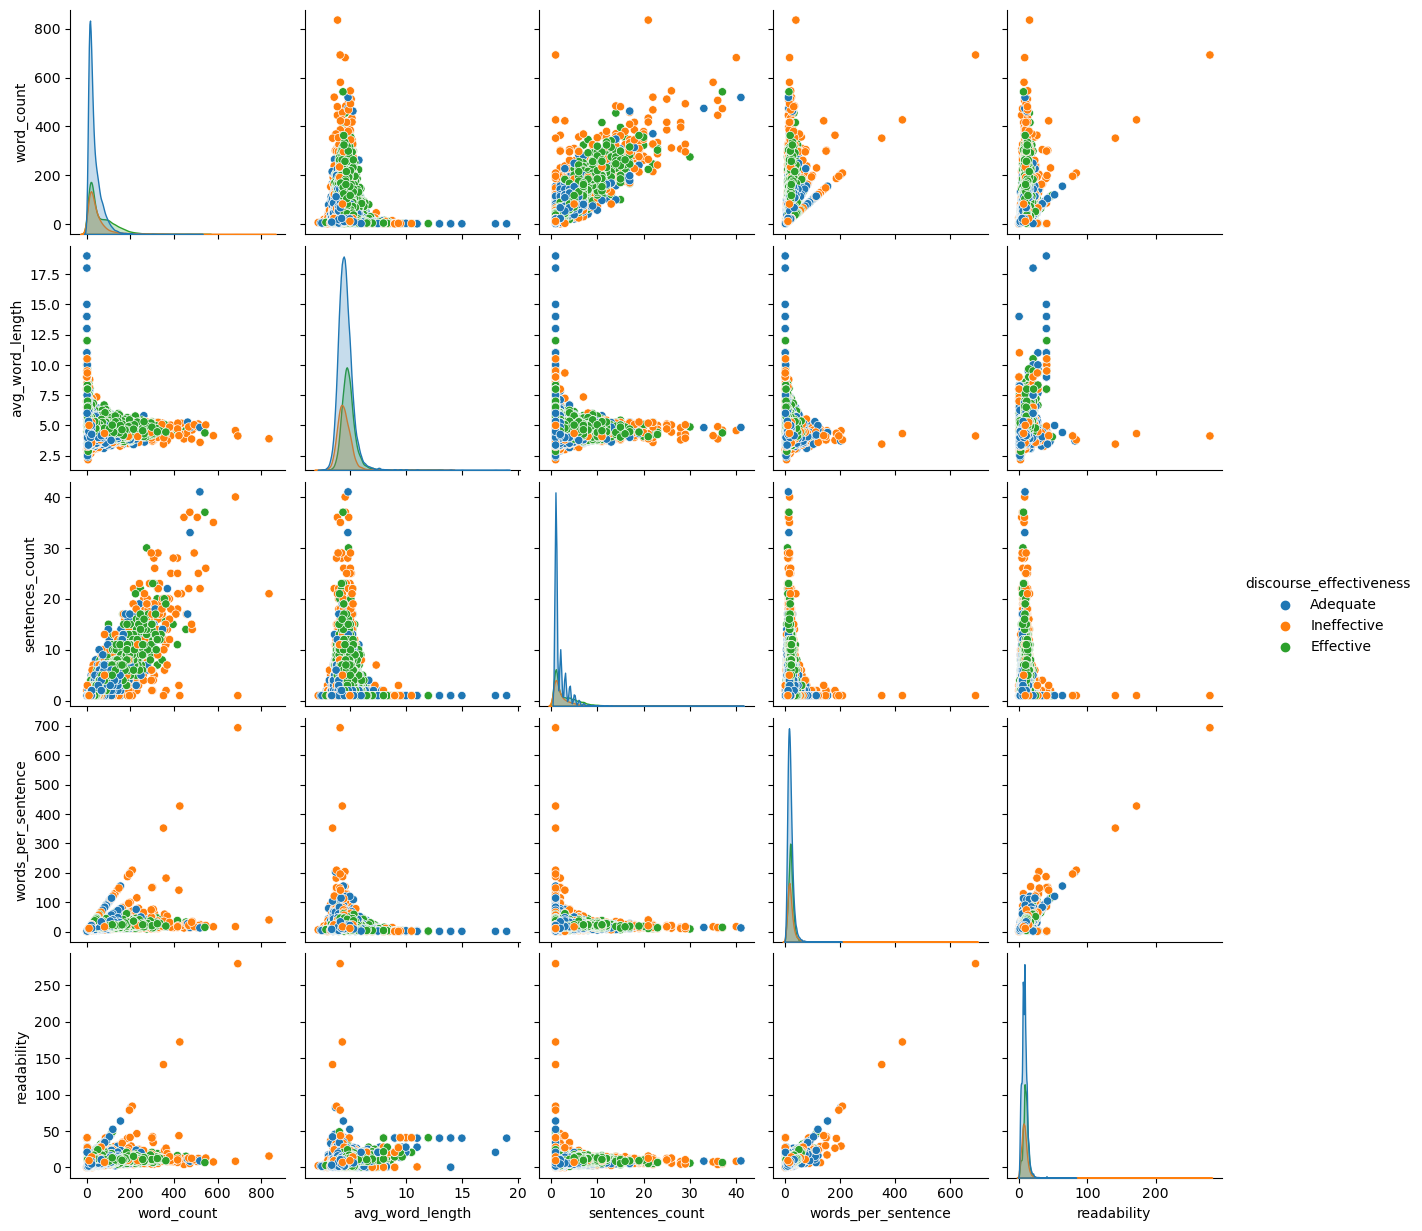

In [24]:
sns.pairplot(data=data, hue="discourse_effectiveness")
plt.show()

In [33]:
proporciones = data['discourse_effectiveness'].value_counts(normalize=True).reset_index()
proporciones.columns = ['discourse_effectiveness', 'Proporción (%)']
proporciones['Proporción (%)'] *= 100  # Convertir proporciones a porcentaje

print("\nTabla de Proporciones:")
print(proporciones)


Tabla de Proporciones:
  discourse_effectiveness  Proporción (%)
0                Adequate       57.056984
1               Effective       25.366517
2             Ineffective       17.576499


In [18]:
data.dtypes

discourse_id                object
essay_id                    object
discourse_text              object
discourse_type              object
discourse_effectiveness     object
word_count                   int64
avg_word_length            float64
sentences_count              int64
words_per_sentence         float64
readability                float64
dtype: object

In [19]:
data.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,word_count,avg_word_length,sentences_count,words_per_sentence,readability
0,0013cc385424,007ACE74B050,hi isaac going writing face mars natural landf...,Lead,Adequate,67,3.731343,3,22.333333,7.894030
1,9704a709b505,007ACE74B050,perspective think face natural landform dont t...,Position,Adequate,41,4.121951,2,20.500000,11.126829
2,c22adee811b6,007ACE74B050,think face natural landform life mars descover...,Claim,Adequate,21,4.000000,1,21.000000,12.209524
3,a10d361e54e4,007ACE74B050,life mars would know reason think natural land...,Evidence,Adequate,72,4.027778,4,18.000000,8.537778
4,db3e453ec4e2,007ACE74B050,people thought face formed alieans thought lif...,Counterclaim,Adequate,18,4.611111,1,18.000000,3.600000


## Preprocesamiento

In [15]:
discourse_type_dummies = pd.get_dummies(data['discourse_type'], prefix='discourse_type')
discourse_effectiveness_dummies = pd.get_dummies(data['discourse_effectiveness'], prefix='discourse_effectiveness')

data_dummies = pd.concat([data, discourse_type_dummies, discourse_effectiveness_dummies], axis=1)
data_dummies.drop(['discourse_type', 'discourse_effectiveness'], axis=1, inplace=True)

data_dummies.head()

,discourse_id,essay_id,discourse_text,word_count,avg_word_length,sentences_count,words_per_sentence,readability,discourse_type_Claim,discourse_type_Concluding Statement,discourse_type_Counterclaim,discourse_type_Evidence,discourse_type_Lead,discourse_type_Position,discourse_type_Rebuttal,discourse_effectiveness_Adequate,discourse_effectiveness_Effective,discourse_effectiveness_Ineffective
0,0013cc385424,007ACE74B050,hi isaac going writing face mars natural landf...,67,3.731343,3,22.333333,7.894030,0,0,0,0,1,0,0,1,0,0
1,9704a709b505,007ACE74B050,perspective think face natural landform dont t...,41,4.121951,2,20.500000,11.126829,0,0,0,0,0,1,0,1,0,0
2,c22adee811b6,007ACE74B050,think face natural landform life mars descover...,21,4.000000,1,21.000000,12.209524,1,0,0,0,0,0,0,1,0,0
3,a10d361e54e4,007ACE74B050,life mars would know reason think natural land...,72,4.027778,4,18.000000,8.537778,0,0,0,1,0,0,0,1,0,0
4,db3e453ec4e2,007ACE74B050,people thought face formed alieans thought lif...,18,4.611111,1,18.000000,3.600000,0,0,1,0,0,0,0,1,0,0


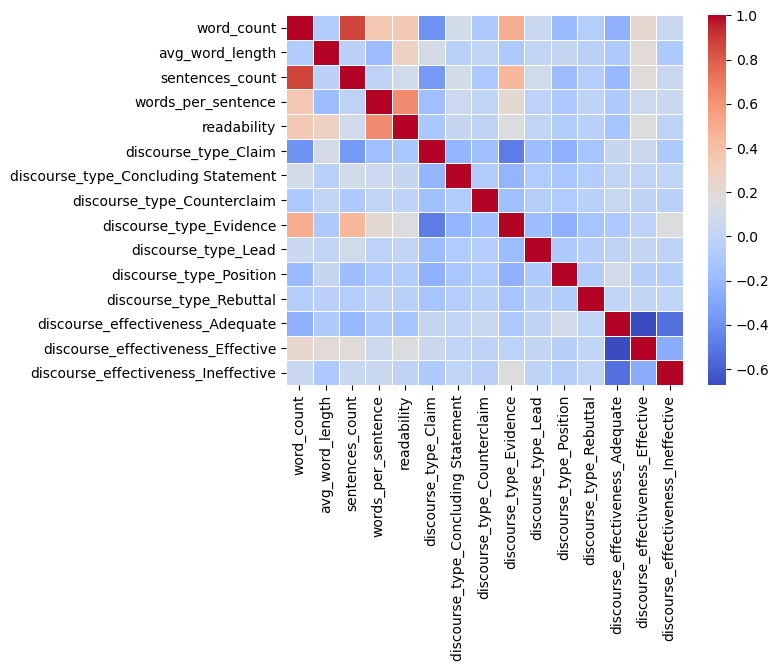

In [32]:
sns.heatmap(data=data_dummies.corr(), annot=False, cmap='coolwarm', linewidths=.5)
plt.show()